In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from nbclient.client import timestamp

df = pd.read_csv('2023ActualForecastData.csv')
df['Date'] = pd.to_datetime(df['Date'])

df1 = pd.read_csv('2024ActualForecastData.csv')
df1['Date'] = pd.to_datetime(df1['Date'])

df2 = pd.read_csv('2025ActualForecastData.csv')
df2['Date'] = pd.to_datetime(df2['Date'])

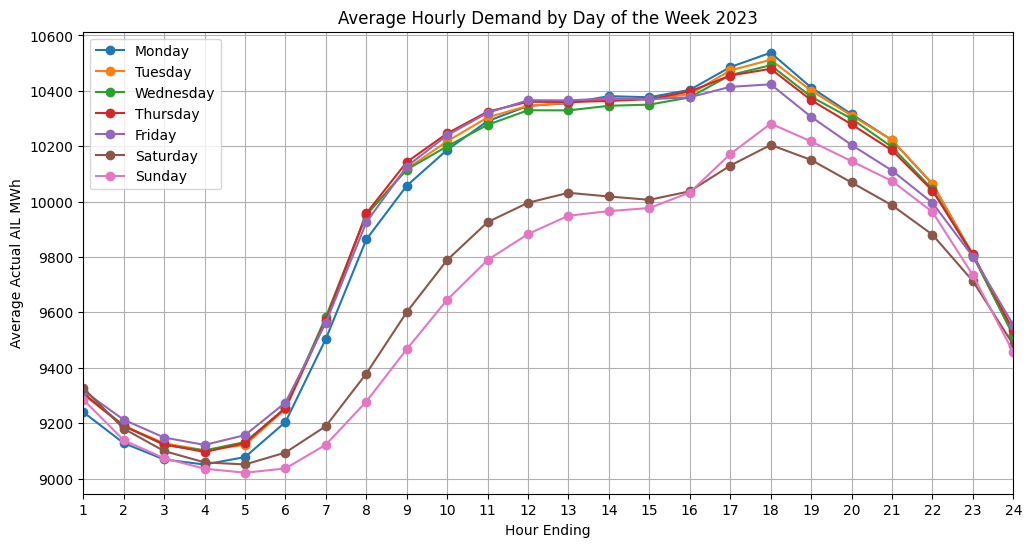

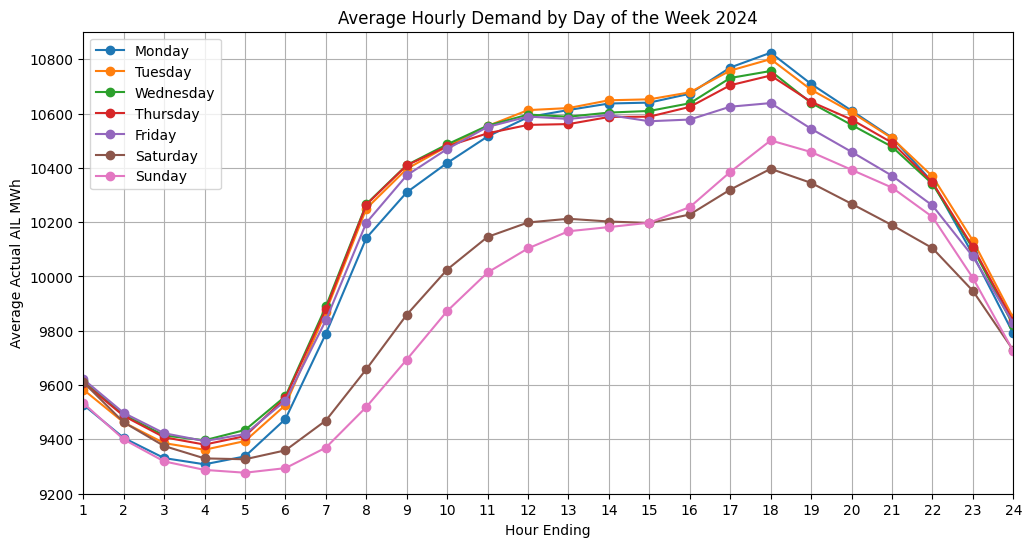

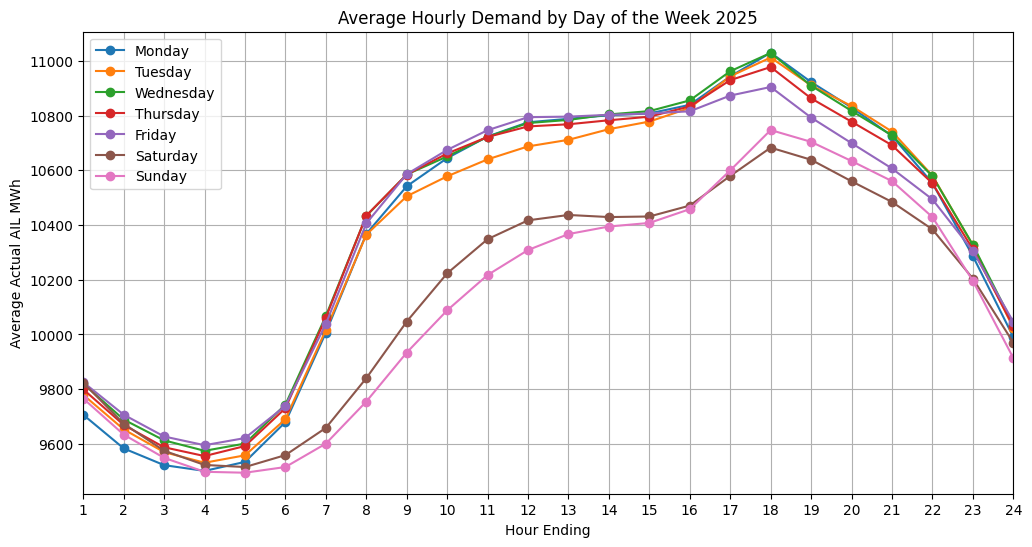

In [100]:
# Section 1: Average demand by hour on different days

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
D = df.groupby(['Hour', df['Date'].dt.weekday])['Actual AIL'].mean()
# Reshape data: Days become columns (lines), Hours become the index (x-axis)
Dday = D.unstack(level=1)
Dday = Dday.rename(columns=day_map)

D1 = df1.groupby(['Hour', df1['Date'].dt.weekday])['Actual AIL'].mean()
D1day = D1.unstack(level=1)
D1day = D1day.rename(columns=day_map)

D2 = df2.groupby(['Hour', df2['Date'].dt.weekday])['Actual AIL'].mean()
D2day = D2.unstack(level=1)
D2day = D2day.rename(columns=day_map)


################################# PLOTS #######################################

# Plot for 2023
Dday.plot(figsize=(12, 6), marker='o')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.title('Average Hourly Demand by Day of the Week 2023')
plt.ylabel('Average Actual AIL MWh')
plt.xlabel('Hour Ending')
plt.grid(True)
plt.legend(loc = 'upper left')

# Plot for 2024
D1day.plot(figsize=(12, 6), marker='o')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.title('Average Hourly Demand by Day of the Week 2024')
plt.ylabel('Average Actual AIL MWh')
plt.xlabel('Hour Ending')
plt.grid(True)
plt.legend(loc = 'upper left')

# Plot for 2025
D2day.plot(figsize=(12, 6), marker='o')
plt.xlim(1, 24)
plt.xticks(range(1, 25))
plt.title('Average Hourly Demand by Day of the Week 2025')
plt.ylabel('Average Actual AIL MWh')
plt.xlabel('Hour Ending')
plt.grid(True)
plt.legend(loc = 'upper left')

plt.show()


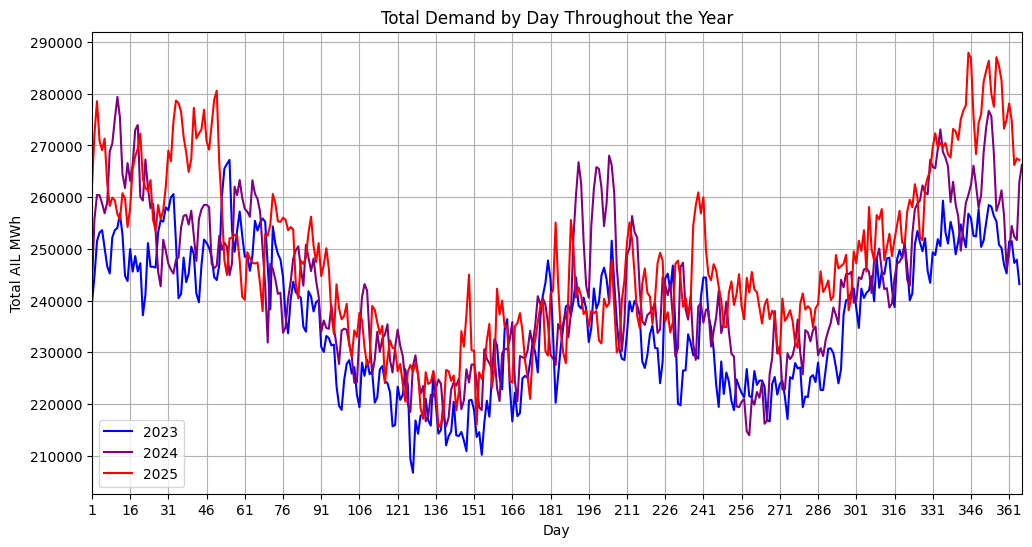

In [101]:
# Section 2: Total Demand by day

t = df.groupby(df['Date'].dt.dayofyear)['Actual AIL'].sum()
t1 = df1.groupby(df1['Date'].dt.dayofyear)['Actual AIL'].sum()
t2 = df2.groupby(df2['Date'].dt.dayofyear)['Actual AIL'].sum()

# Plot
td = pd.DataFrame({
    '2023': t,
    '2024': t1,
    '2025': t2
})
td.plot(figsize=(12, 6), alpha=1, color = ['blue', 'purple', 'red'], label = ['2023', '2024', '2025'])
plt.xlim(1, 366)
plt.xticks(range(1, 366, 15))
plt.title('Total Demand by Day Throughout the Year')
plt.ylabel('Total AIL MWh')
plt.xlabel('Day')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



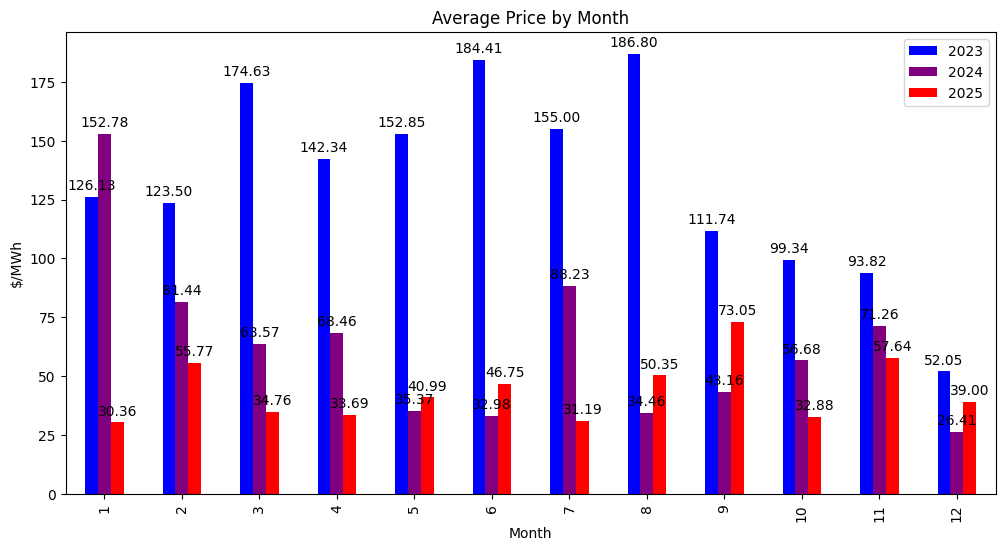

In [102]:
# Section 3: Average price/MWh by Month

pm = df.groupby(df['Date'].dt.month)['Actual Posted Pool Price'].mean()
pm1 = df1.groupby(df['Date'].dt.month)['Actual Posted Pool Price'].mean()
pm2 = df2.groupby(df['Date'].dt.month)['Actual Posted Pool Price'].mean()

# Plot for average price per month
price_monthly = pd.DataFrame({
    '2023': pm,
    '2024': pm1,
    '2025': pm2
})

# Create grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))
price_monthly.plot(ax=ax1, kind='bar', color=['blue', 'purple', 'red'], alpha=1)

# Add values on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f', padding=3)

plt.title('Average Monthly Price')
plt.xlabel('Month')
plt.ylabel('$/MWh')
plt.legend(loc='upper right')
plt.show()




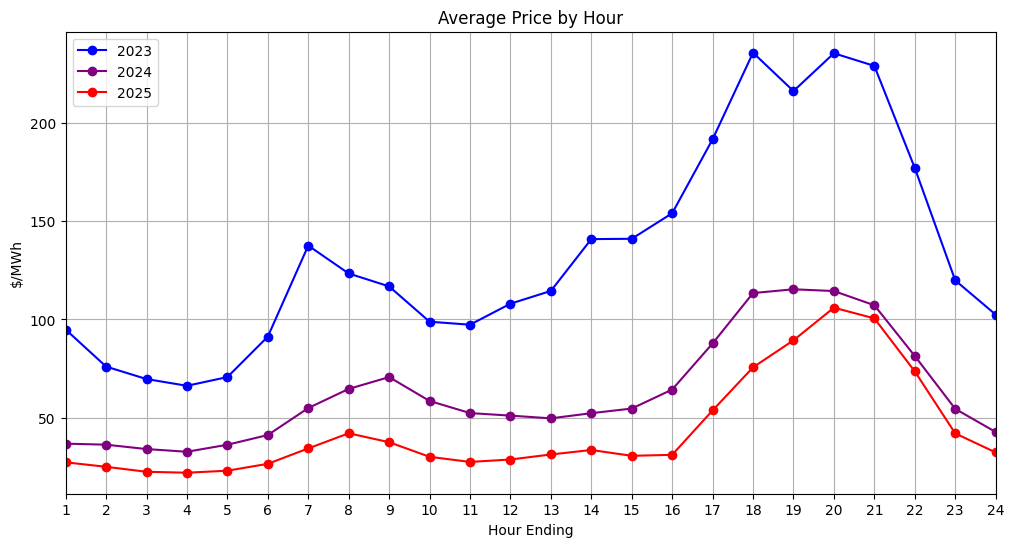

In [109]:
# Section 4: Average price/MWh by hour

ph = df.groupby(df['Hour'])['Actual Posted Pool Price'].mean()
ph1 = df1.groupby(df['Hour'])['Actual Posted Pool Price'].mean()
ph2 = df2.groupby(df['Hour'])['Actual Posted Pool Price'].mean()

# Plot for average price per hour
fig, ax2 = plt.subplots(figsize=(12, 6))
price_hourly = pd.DataFrame({
    '2023': ph,
    '2024': ph1,
    '2025': ph2
})
price_hourly.plot(ax=ax2, kind='line', color=['blue','purple', 'red'], alpha=1, marker='o')
plt.xlim(1,24)
plt.xticks(range(1,25))
plt.title('Average Price by Hour')
plt.xlabel('Hour Ending')
plt.ylabel('$/MWh')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


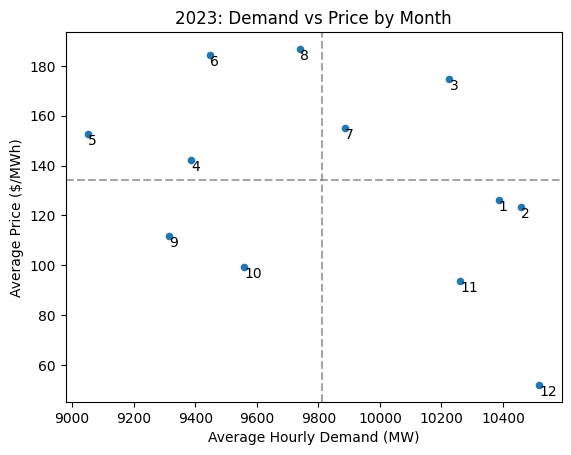

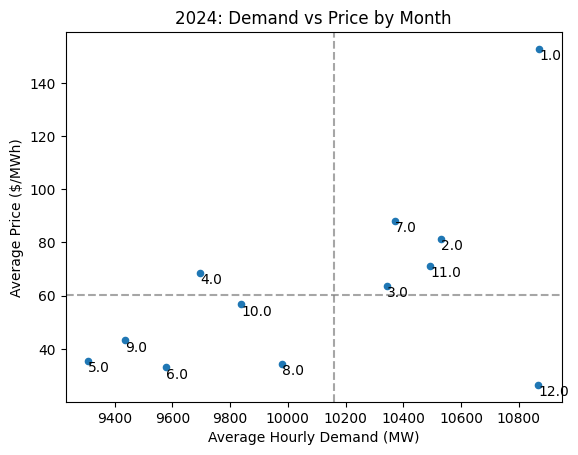

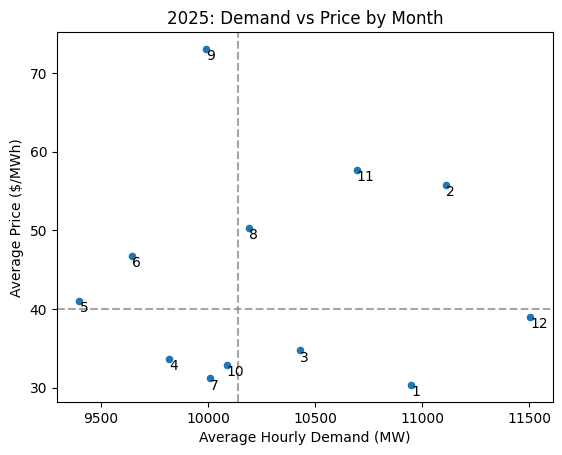

In [104]:
# Section 5: Relationship between price and demand by month

pd = df.groupby(df['Date'].dt.month).agg({
    'Actual Posted Pool Price' : 'mean',
    'Actual AIL' : 'mean'
})

pd1 = df1.groupby(df['Date'].dt.month).agg({
    'Actual Posted Pool Price' : 'mean',
    'Actual AIL' : 'mean'
})

pd2 = df2.groupby(df['Date'].dt.month).agg({
    'Actual Posted Pool Price' : 'mean',
    'Actual AIL' : 'mean'
})

# 2023
pd.plot(x='Actual AIL', y='Actual Posted Pool Price', kind='scatter')
median_demand = pd['Actual AIL'].median()
median_price = pd['Actual Posted Pool Price'].median()
plt.axhline(y=median_price, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_demand, color='gray', linestyle='--', alpha=0.7)

for month in pd.index:
    plt.text(pd.loc[month, 'Actual AIL'],
             pd.loc[month, 'Actual Posted Pool Price'],
             str(month),
             fontsize=10,
             ha='left', va='top')
plt.title('2023: Demand vs Price by Month')
plt.xlabel('Average Hourly Demand (MW)')
plt.ylabel('Average Price ($/MWh)')
plt.show()

# 2024
pd1.plot(x='Actual AIL', y='Actual Posted Pool Price', kind='scatter')
median_demand = pd1['Actual AIL'].median()
median_price = pd1['Actual Posted Pool Price'].median()
plt.axhline(y=median_price, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_demand, color='gray', linestyle='--', alpha=0.7)

for month in pd1.index:
    plt.text(pd1.loc[month, 'Actual AIL'],
             pd1.loc[month, 'Actual Posted Pool Price'],
             str(month),
             fontsize=10,
             ha='left', va='top')
plt.title('2024: Demand vs Price by Month')
plt.xlabel('Average Hourly Demand (MW)')
plt.ylabel('Average Price ($/MWh)')
plt.show()

# 2025
pd2.plot(x='Actual AIL', y='Actual Posted Pool Price', kind='scatter')
median_demand = pd2['Actual AIL'].median()
median_price = pd2['Actual Posted Pool Price'].median()
plt.axhline(y=median_price, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=median_demand, color='gray', linestyle='--', alpha=0.7)

for month in pd2.index:
    plt.text(pd2.loc[month, 'Actual AIL'],
             pd2.loc[month, 'Actual Posted Pool Price'],
             str(month),
             fontsize=10,
             ha='left', va='top')
plt.title('2025: Demand vs Price by Month')
plt.xlabel('Average Hourly Demand (MW)')
plt.ylabel('Average Price ($/MWh)')
plt.show()